 <div name="author" style="text-align: right"> Thomas Pineau </div>
<h1>IVI - Traces Web et module requests</h1>

## 1. Installation des modules

Depuis le terminal (UNIX) ou invite de commande (Windows).

In [ ]:
pip install requests requests[socks] pysocks

* [**requests**](https://requests.readthedocs.io/en/master/): gestion des requêtes HTTP.
* [**pysocks**](https://github.com/Anorov/PySocks): gestion de proxy.

## 2. Script http_requests.py

### 2.1. Importation des modules

In [1]:
import requests

### 2.2. Les en-têtes HTTP (headers)

Avec requests, les en-têtes peuvent être définies dans un dictionnaire.
La liste des clefs traditionnellement envoyée est consultable [en ligne](https://developer.mozilla.org/fr/docs/Web/HTTP/Headers). 

**En-têtes de la requête**, clefs principales:
* **user-agent**: chaîne de caractères libre qui permet de reconnaitre l'application, le système d'exploitation, le fournisseur du logiciel ou la version du logiciel du client. La [liste](https://developers.whatismybrowser.com/useragents/explore) des principaux user-agent.
* **referer**: L'URL précédente à partir de laquelle le lien a été demandée.
* **cookie**: Les éventuels cookies obtenus par le serveur. 

In [2]:
headers = {
            'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.169 Safari/537.36',
            'referer': None,
            'cookie': None
        }

### 2.2. La requête GET

La requête HTTP GET permet de demander l'accès à une ressource web via son URL.


In [3]:
url = 'http://example.com/'
response = requests.get(url, headers=headers)

#### Résultat

##### Corps de la réponse - <span style="color: red;">Code serveur</span>
Chaine de caractères avec les données de la ressource demandée.

In [4]:
print(response.text)

<!doctype html>
<html>
<head>
    <title>Example Domain</title>

    <meta charset="utf-8" />
    <meta http-equiv="Content-type" content="text/html; charset=utf-8" />
    <meta name="viewport" content="width=device-width, initial-scale=1" />
    <style type="text/css">
    body {
        background-color: #f0f0f2;
        margin: 0;
        padding: 0;
        font-family: -apple-system, system-ui, BlinkMacSystemFont, "Segoe UI", "Open Sans", "Helvetica Neue", Helvetica, Arial, sans-serif;
        
    }
    div {
        width: 600px;
        margin: 5em auto;
        padding: 2em;
        background-color: #fdfdff;
        border-radius: 0.5em;
        box-shadow: 2px 3px 7px 2px rgba(0,0,0,0.02);
    }
    a:link, a:visited {
        color: #38488f;
        text-decoration: none;
    }
    @media (max-width: 700px) {
        div {
            margin: 0 auto;
            width: auto;
        }
    }
    </style>    
</head>

<body>
<div>
    <h1>Example Domain</h1>
    <p>This domai

##### Le code statut

Chiffre retourné indiquant comment la requête a été traitée.
Les statuts peuvent être regroupés en 5 [catégories](https://developer.mozilla.org/fr/docs/Web/HTTP/Status):
* entre 100 et 199: réponse informative
* **entre 200 et 299: réponse de succès** (par exemple: 200 -> ok)
* entre 300 et 399: redirection
* entre 400 et 499: erreur du client (par exemple: 404 -> non trouvé)
* entre 500 et 599: erreur du serveur



In [5]:
print(response.status_code)

200


##### l'URL finale 

URL après les éventuelles redirection.

In [6]:
print(response.url)

http://example.com/


##### En-têtes de la réponse (headers)

In [7]:
print(response.headers)

{'Content-Encoding': 'gzip', 'Accept-Ranges': 'bytes', 'Age': '527990', 'Cache-Control': 'max-age=604800', 'Content-Type': 'text/html; charset=UTF-8', 'Date': 'Thu, 30 Sep 2021 11:12:13 GMT', 'Etag': '"3147526947"', 'Expires': 'Thu, 07 Oct 2021 11:12:13 GMT', 'Last-Modified': 'Thu, 17 Oct 2019 07:18:26 GMT', 'Server': 'ECS (dcb/7F81)', 'Vary': 'Accept-Encoding', 'X-Cache': 'HIT', 'Content-Length': '648'}


##### Le délai entre l'envoi de requête et la réception de la réponse

In [8]:
print(response.elapsed)

0:00:00.240093


### 2.3. Proxy TOR

Il faut préalablement [installer Tor](https://www.torproject.org/fr/) sur votre machine.

In [9]:
proxies = {
    'http': 'socks5h://127.0.0.1:9150',
    'https': 'socks5h://127.0.0.1:9150'
}

response = requests.get('https://facebookcorewwwi.onion/', proxies=proxies)

Utilisation du proxy dans la requête GET, il faut laisser le navigateur Tor ouvert en arrière plan.

*Remarque: utilisez le port 9050 si Tor est configuré comme un service.*

**Résultat**

<!DOCTYPE html><html lang="en" id="facebook"><head><title>Facebook</title><meta charset="utf-8" /><meta http-equiv="Cache-Control" content="no-cache" /><meta name="robots" content="noindex,nofollow" /><style nonce="WIu7IHHV">html, body { color: #333; font-family: 'Lucida Grande', 'Tahoma', 'Verdana', 'Arial', sans-serif; margin: 0; padding: 0; text-align: center;}
#header { height: 30px; padding-bottom: 10px; padding-top: 10px; text-align: center;}
#icon { width: 30px;}
.core { margin: auto; padding: 1em 0; text-align: left; width: 904px;}
h1 { font-size: 18px;}
p { font-size: 13px;}
.footer { border-top: 1px solid #ddd; color: #777; float: left; font-size: 11px; padding: 5px 8px 6px 0; width: 904px;}</style></head><body><div id="header"></div><div class="core"><h1>Facebook over Tor has moved</h1><p>Facebook over Tor has moved to a new onion service.</p><p>Visit <a href="https://www.facebookwkhpilnemxj7asaniu7vnjjbiltxjqhye3mhbshg7kx5tfyd.onion">facebookwkhpilnemxj7asaniu7vnjjbiltxjqhy
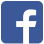

In [10]:
print(response.text)

Vous pouvez également accéder à des URL hors ".onion".

In [11]:
response_tor = requests.get('http://httpbin.org/ip', proxies=proxies)
response_clear = requests.get('http://httpbin.org/ip')
print('IP clear', response_clear.text)
print('IP Tor', response_tor.text)

IP clear {
  "origin": "192.33.206.62"
}

IP Tor {
  "origin": "209.127.17.242"
}

